## Importing all the necessary libraries

In [ ]:
# Install the below mentioned libraries before running this notebook

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Loading Datasets

In [8]:
df_gpu = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/gpu.csv")

In [9]:
df_app = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/application-checkpoints.csv")

In [10]:
df_task = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/task-x-y.csv")

#### GPU Dataset

In [11]:
# Printing first few lines
df_gpu.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [53]:
# Checking diemnsions of data 
df_gpu.shape

(1543681, 8)

#### Application Checkpoint Dataset

In [12]:
# Printing first few lines
df_app.head()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [14]:
# Checking diemnsions of data 
df_app.shape

(660400, 6)

#### Tast Dataset

In [15]:
# Printing first few lines
df_task.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [16]:
# Checking diemnsions of data
df_task.shape

(65793, 5)

# Exploratory Data Analysis

In [17]:
def timestamp_conv(df):
    """
    Converts a timestamp to datetime
    
    Parameters
    ----------
    df
        dataframe to convert to datetime
    ----------
    float
        converted timestamp
    """
    df = df.apply(lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))    
    return(df)  

In [52]:
df_gpu['hostname'].value_counts()

35bd84d72aca403b8129a7d652cc2750000005    3002
4a79b6d2616049edbf06c6aa58ab426a00000Y    3002
4ad946d4435c42dabb5073531ea4f315000001    3002
0745914f4de046078517041d70b22fe7000005    3002
95b4ae6d890e4c46986d91d7ac4bf082000010    2992
                                          ... 
0d56a730076643d585f77e00d2d8521a00000I    1492
0d56a730076643d585f77e00d2d8521a00000X    1492
0d56a730076643d585f77e00d2d8521a00000N    1492
0d56a730076643d585f77e00d2d8521a00000S    1491
0d56a730076643d585f77e00d2d8521a000012    1489
Name: hostname, Length: 1024, dtype: int64

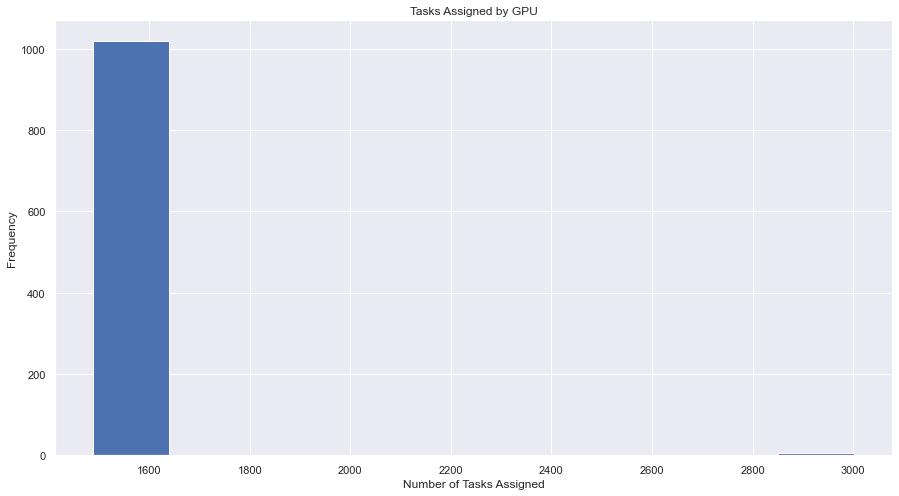

In [54]:
# Plotting host name frequency
df_gpu['hostname'].value_counts().plot(kind = 'hist')
plt.xlabel('Number of Tasks Assigned')
plt.title('Tasks Assigned by GPU')
plt.rcParams['figure.figsize'] = [10, 6]

 # Saving figure
#plt.savefig('Images/tasks.png')
plt.show()

In [83]:
x = df_gpu.gpuTempC
y = df_gpu.powerDrawWatt

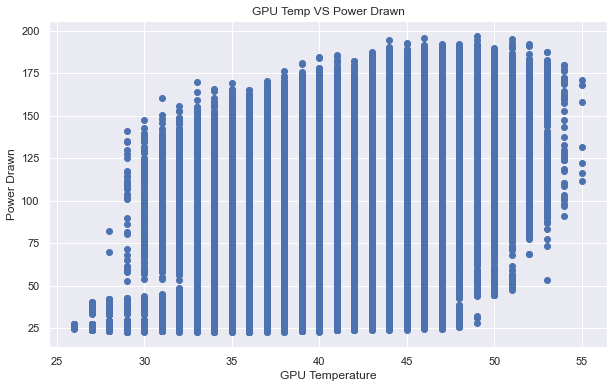

In [84]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Temperature')
plt.ylabel('Power Drawn')
plt.title('GPU Temp VS Power Drawn')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
plt.savefig('Images/temp-power.png')
plt.show()

In [80]:
x = df_gpu.gpuMemUtilPerc
y = df_gpu.gpuUtilPerc

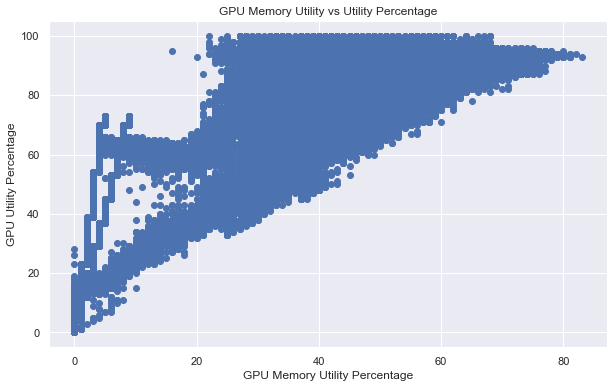

In [81]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Memory Utility Percentage')
plt.ylabel('GPU Utility Percentage')
plt.title('GPU Memory Utility vs Utility Percentage')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
plt.savefig('Images/mem-utility.png')
plt.show()

In [17]:
# Summary of the data
df_gpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543681 entries, 0 to 1543680
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       1543681 non-null  object 
 1   hostname        1543681 non-null  object 
 2   gpuSerial       1543681 non-null  int64  
 3   gpuUUID         1543681 non-null  object 
 4   powerDrawWatt   1543681 non-null  float64
 5   gpuTempC        1543681 non-null  int64  
 6   gpuUtilPerc     1543681 non-null  int64  
 7   gpuMemUtilPerc  1543681 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 94.2+ MB


In [63]:
# Statistical Sumary of the data
df_gpu.describe()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
count,1.543681e+06,1.543681e+06,1.543681e+06,1.543681e+06,1.543681e+06
mean,3.239836e+11,8.919838e+01,4.007560e+01,6.305820e+01,3.341359e+01
std,1.228841e+09,3.975742e+01,3.800243e+00,4.144816e+01,2.300107e+01
min,3.201181e+11,2.255000e+01,2.600000e+01,0.000000e+00,0.000000e+00
25%,3.236170e+11,4.499000e+01,3.800000e+01,0.000000e+00,0.000000e+00
50%,3.236170e+11,9.659000e+01,4.000000e+01,8.900000e+01,4.300000e+01
75%,3.250170e+11,1.213400e+02,4.200000e+01,9.200000e+01,5.100000e+01
max,3.252171e+11,1.970100e+02,5.500000e+01,1.000000e+02,8.300000e+01


In [71]:
# Seperating numerical columns needed to find correlation
gpu_corr = df_gpu.iloc[:,4:8]

# Finding correlation
gpu_corr.corr()

,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
powerDrawWatt,1.000000,0.537191,0.862673,0.870745
gpuTempC,0.537191,1.000000,0.505906,0.492783
gpuUtilPerc,0.862673,0.505906,1.000000,0.966571
gpuMemUtilPerc,0.870745,0.492783,0.966571,1.000000


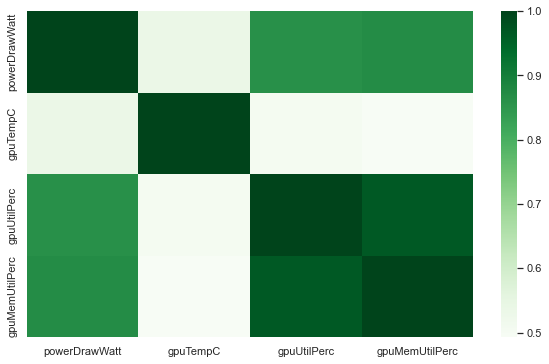

In [73]:
# Plotting Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(gpu_corr.corr(),cmap='Greens',annot=False)

# Saving Image
plt.savefig('Images/Heat-map.png')
plt.show()

In [20]:
# Displaying total iterations based on event name
df_app['eventName'].value_counts()

Tiling           132080
Saving Config    132080
Render           132080
TotalRender      132080
Uploading        132080
Name: eventName, dtype: int64

In [21]:
# Displaying total iterations based on event type
df_app['eventType'].value_counts()

STOP     330200
START    330200
Name: eventType, dtype: int64

In [22]:
# Displaying counts based on level
df_task['level'].value_counts()

12    65536
8       256
4         1
Name: level, dtype: int64

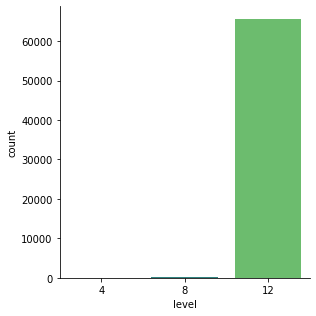

In [23]:
sns.catplot(x='level',kind='count', data=df_task, height=4.5, palette='viridis')

Text(0.5, 1.0, 'Task Workload')

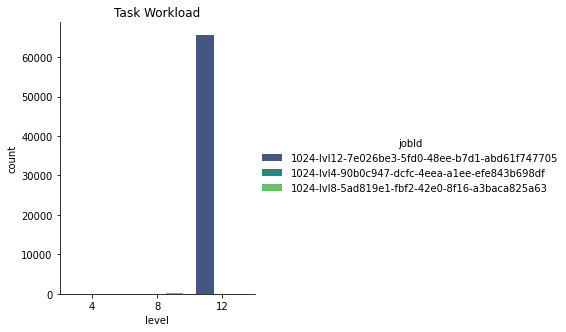

In [24]:
sns.catplot(x='level', kind='count', data=df_task, hue = "jobId", height=4.5, palette='viridis')
plt.title("Task Workload")

## Plotting pair subplots to obtain relationship between variables. 

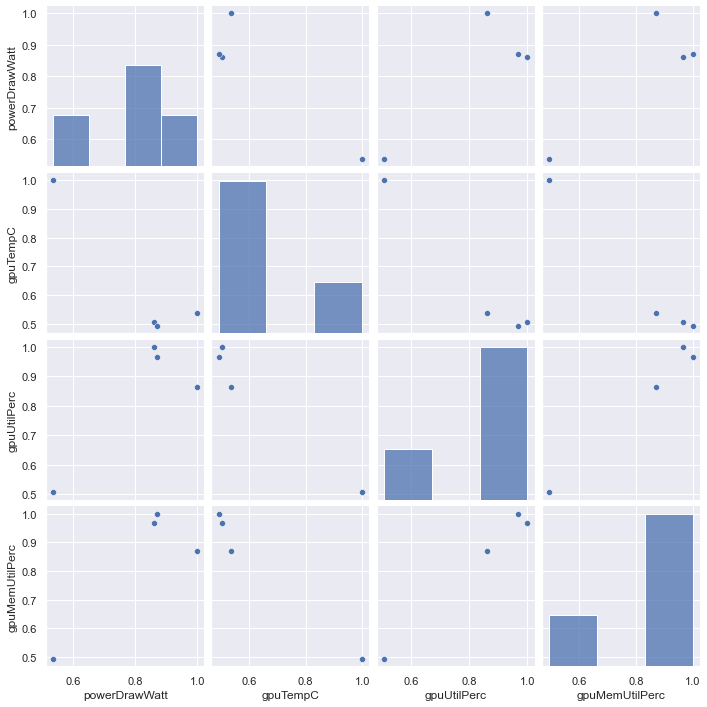

In [42]:

matrix_corr = df_gpu.iloc[:,4:8].corr()
sns.pairplot(matrix_corr)

## Plotting Histogram to visualize the power consumption range

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'GPU Power Consumption')

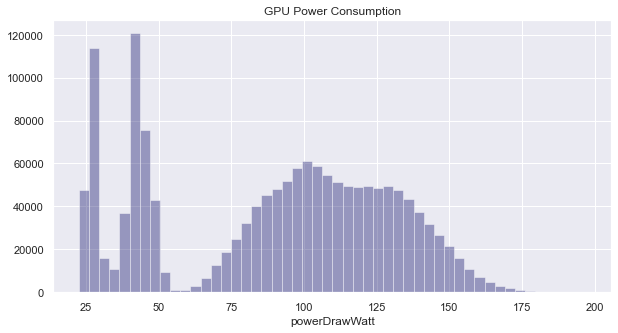

In [37]:
plt.figure(figsize=(10,5)) 
sns.set()
sns.distplot(df_gpu['powerDrawWatt'], kde = False, color = 'midnightblue', label = "Age")

plt.title("GPU Power Consumption")

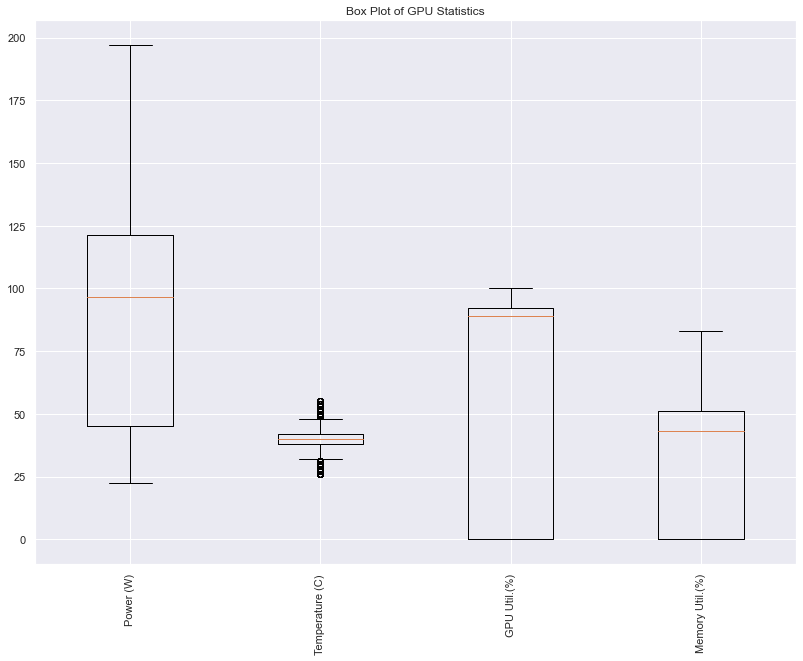

In [66]:
# List of gpu statical labels mentioned in the dataset
gpu_stats = ['Power (W)','Temperature (C)','GPU Util.(%)','Memory Util.(%)']

plt.subplot(1, 2, 1)
plt.boxplot([df_gpu['powerDrawWatt'], df_gpu['gpuTempC'],
df_gpu['gpuUtilPerc'], df_gpu['gpuMemUtilPerc']])

# Add labels
plt.xticks([i+1 for i, x in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')

# Plot Title
plt.title('Box Plot of GPU Statistics')
plt.rcParams['figure.figsize'] = [30, 10]

# Saving Image
plt.savefig('Images/Box-plot.png')
plt.show()


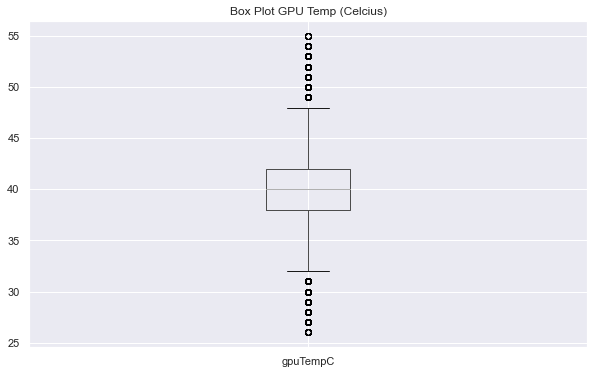

In [68]:
# Plotting scatter plot
#fig = plt.figure(figsize = (10,7))
df_gpu.boxplot(column = ["gpuTempC"])
plt.title('Box Plot GPU Temp (Celcius)')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
plt.savefig('Images/Box-plot_gpu_temp.png')
plt.show()